## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.843239 -0.388671 -1.207024 -1.409287 -0.567191 -0.239990
1  1.019998 -0.641012  0.087550  0.968498  1.509139  0.940590
2 -0.027533 -0.202343 -1.158365 -1.189403  1.314623  0.094067
3  0.651885 -1.254568 -1.078767  1.175063  0.792339  0.528853
4  1.648079  1.177860 -0.945251 -1.370469 -0.301790 -0.844800


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9929155	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9829760	total: 58ms	remaining: 28.9s
2:	learn: 0.9731051	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9633838	total: 59ms	remaining: 14.7s
4:	learn: 0.9519646	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9413897	total: 60.4ms	remaining: 10s
6:	learn: 0.9307369	total: 61ms	remaining: 8.65s
7:	learn: 0.9199317	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9103224	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9005569	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8929226	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8828929	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8735215	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8642955	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8552092	total: 65.3ms	remaining: 4.28s
15:	learn: 0.8466083	total: 65.6ms	remaining: 4.04s
16:	learn: 0.8371250	total: 66ms	remaining: 3.82s
17:	learn: 0.8288531	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8185655	total: 66.9ms	remaining: 3.45s
19:

105:	learn: 0.3796262	total: 109ms	remaining: 921ms
106:	learn: 0.3767237	total: 110ms	remaining: 917ms
107:	learn: 0.3738223	total: 110ms	remaining: 912ms
108:	learn: 0.3710488	total: 111ms	remaining: 906ms
109:	learn: 0.3682975	total: 111ms	remaining: 899ms
110:	learn: 0.3655635	total: 112ms	remaining: 894ms
111:	learn: 0.3630522	total: 112ms	remaining: 887ms
112:	learn: 0.3606655	total: 113ms	remaining: 883ms
113:	learn: 0.3580233	total: 113ms	remaining: 877ms
114:	learn: 0.3548686	total: 113ms	remaining: 872ms
115:	learn: 0.3524905	total: 114ms	remaining: 867ms
116:	learn: 0.3500158	total: 114ms	remaining: 861ms
117:	learn: 0.3471640	total: 114ms	remaining: 856ms
118:	learn: 0.3448462	total: 115ms	remaining: 851ms
119:	learn: 0.3422023	total: 115ms	remaining: 846ms
120:	learn: 0.3396704	total: 116ms	remaining: 843ms
121:	learn: 0.3373040	total: 117ms	remaining: 839ms
122:	learn: 0.3350523	total: 117ms	remaining: 836ms
123:	learn: 0.3327574	total: 118ms	remaining: 832ms
124:	learn: 

266:	learn: 0.1262354	total: 187ms	remaining: 514ms
267:	learn: 0.1257117	total: 188ms	remaining: 513ms
268:	learn: 0.1253026	total: 188ms	remaining: 511ms
269:	learn: 0.1246986	total: 189ms	remaining: 510ms
270:	learn: 0.1237855	total: 189ms	remaining: 509ms
271:	learn: 0.1230437	total: 190ms	remaining: 508ms
272:	learn: 0.1222478	total: 190ms	remaining: 507ms
273:	learn: 0.1218634	total: 191ms	remaining: 505ms
274:	learn: 0.1212395	total: 191ms	remaining: 504ms
275:	learn: 0.1208492	total: 192ms	remaining: 503ms
276:	learn: 0.1204634	total: 193ms	remaining: 504ms
277:	learn: 0.1199149	total: 193ms	remaining: 502ms
278:	learn: 0.1193660	total: 194ms	remaining: 501ms
279:	learn: 0.1188190	total: 194ms	remaining: 500ms
280:	learn: 0.1182727	total: 195ms	remaining: 498ms
281:	learn: 0.1175699	total: 195ms	remaining: 497ms
282:	learn: 0.1171494	total: 196ms	remaining: 496ms
283:	learn: 0.1166040	total: 196ms	remaining: 494ms
284:	learn: 0.1162542	total: 197ms	remaining: 493ms
285:	learn: 

488:	learn: 0.0412928	total: 293ms	remaining: 306ms
489:	learn: 0.0410462	total: 294ms	remaining: 306ms
490:	learn: 0.0408711	total: 294ms	remaining: 305ms
491:	learn: 0.0407010	total: 294ms	remaining: 304ms
492:	learn: 0.0404330	total: 295ms	remaining: 303ms
493:	learn: 0.0402675	total: 296ms	remaining: 303ms
494:	learn: 0.0402116	total: 296ms	remaining: 302ms
495:	learn: 0.0399699	total: 297ms	remaining: 302ms
496:	learn: 0.0398773	total: 297ms	remaining: 301ms
497:	learn: 0.0397404	total: 298ms	remaining: 300ms
498:	learn: 0.0394483	total: 298ms	remaining: 299ms
499:	learn: 0.0392914	total: 299ms	remaining: 299ms
500:	learn: 0.0392380	total: 299ms	remaining: 298ms
501:	learn: 0.0391851	total: 300ms	remaining: 297ms
502:	learn: 0.0389013	total: 300ms	remaining: 296ms
503:	learn: 0.0388464	total: 300ms	remaining: 296ms
504:	learn: 0.0387920	total: 301ms	remaining: 295ms
505:	learn: 0.0385156	total: 301ms	remaining: 294ms
506:	learn: 0.0384622	total: 301ms	remaining: 293ms
507:	learn: 

652:	learn: 0.0209320	total: 371ms	remaining: 197ms
653:	learn: 0.0208686	total: 371ms	remaining: 197ms
654:	learn: 0.0207560	total: 372ms	remaining: 196ms
655:	learn: 0.0206923	total: 372ms	remaining: 195ms
656:	learn: 0.0205827	total: 373ms	remaining: 195ms
657:	learn: 0.0204653	total: 373ms	remaining: 194ms
658:	learn: 0.0203647	total: 374ms	remaining: 193ms
659:	learn: 0.0202390	total: 374ms	remaining: 193ms
660:	learn: 0.0202090	total: 375ms	remaining: 192ms
661:	learn: 0.0200865	total: 375ms	remaining: 192ms
662:	learn: 0.0200572	total: 376ms	remaining: 191ms
663:	learn: 0.0199874	total: 376ms	remaining: 190ms
664:	learn: 0.0199187	total: 377ms	remaining: 190ms
665:	learn: 0.0198901	total: 377ms	remaining: 189ms
666:	learn: 0.0198126	total: 378ms	remaining: 189ms
667:	learn: 0.0197450	total: 378ms	remaining: 188ms
668:	learn: 0.0196372	total: 379ms	remaining: 187ms
669:	learn: 0.0196094	total: 379ms	remaining: 187ms
670:	learn: 0.0195218	total: 380ms	remaining: 186ms
671:	learn: 

881:	learn: 0.0092325	total: 476ms	remaining: 63.6ms
882:	learn: 0.0092055	total: 476ms	remaining: 63.1ms
883:	learn: 0.0091973	total: 477ms	remaining: 62.6ms
884:	learn: 0.0091680	total: 477ms	remaining: 62ms
885:	learn: 0.0091448	total: 477ms	remaining: 61.4ms
886:	learn: 0.0090883	total: 478ms	remaining: 60.9ms
887:	learn: 0.0090324	total: 478ms	remaining: 60.3ms
888:	learn: 0.0090244	total: 479ms	remaining: 59.8ms
889:	learn: 0.0089796	total: 479ms	remaining: 59.3ms
890:	learn: 0.0089408	total: 480ms	remaining: 58.7ms
891:	learn: 0.0089329	total: 480ms	remaining: 58.2ms
892:	learn: 0.0089034	total: 481ms	remaining: 57.6ms
893:	learn: 0.0088956	total: 481ms	remaining: 57.1ms
894:	learn: 0.0088700	total: 482ms	remaining: 56.5ms
895:	learn: 0.0088323	total: 482ms	remaining: 56ms
896:	learn: 0.0088246	total: 482ms	remaining: 55.4ms
897:	learn: 0.0088023	total: 483ms	remaining: 54.8ms
898:	learn: 0.0087599	total: 483ms	remaining: 54.3ms
899:	learn: 0.0087522	total: 484ms	remaining: 53.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

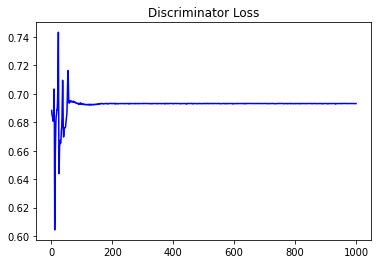

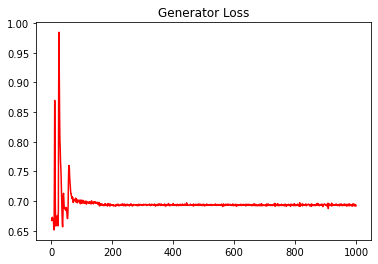

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13506051733683727


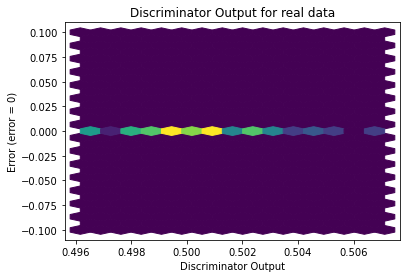

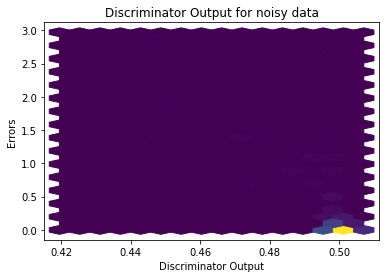

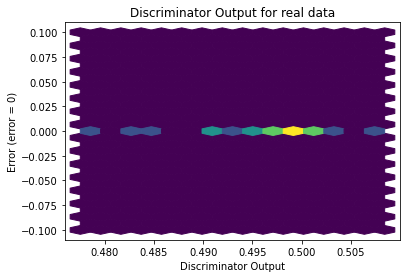

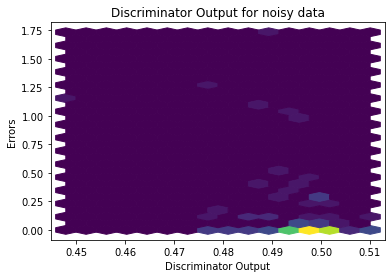

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


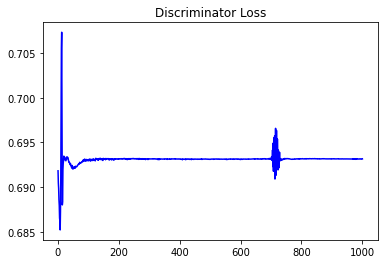

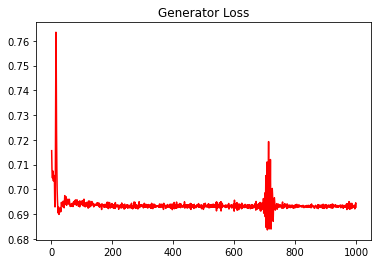

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14072481786271301


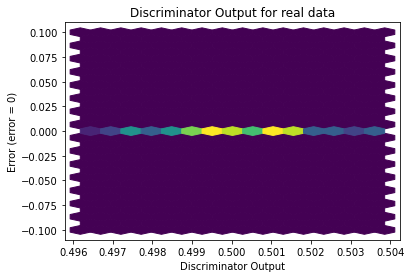

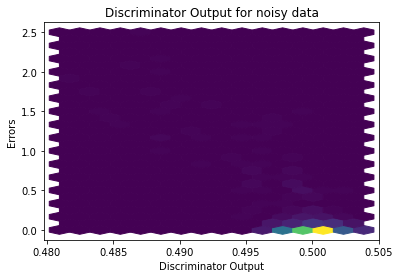

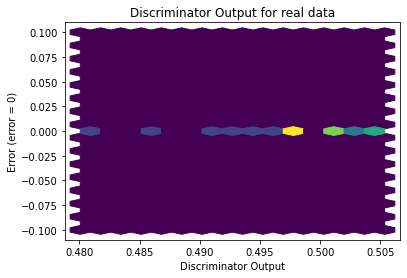

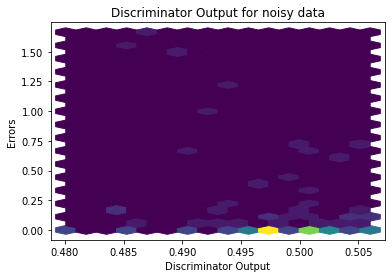

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4541]], requires_grad=True)
